
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [ ]:
!pip install reportlab

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib import colors


In [ ]:
import pandas as pd
from google.colab import files

# Upload a file from your local system
uploaded = files.upload()

doc = SimpleDocTemplate("report.pdf", pagesize=letter)

# Define styles
styles = getSampleStyleSheet()
heading1_style = styles["Heading1"]
subheading_style = ParagraphStyle('subheading', parent=styles['Normal'])
subheading_style.fontName = 'Helvetica-Bold'
subheading_style.fontSize = 12

# Create content for the PDF
content = []


# Iterate through the uploaded files
for filename in uploaded.keys():
    print(f'File "{filename}" uploaded successfully.')

    # Read the uploaded CSV file into a DataFrame
    df = pd.read_csv(filename)
    # Display the DataFrame
content.append(Paragraph("Analysis Report of {}".format(filename), heading1_style))






Saving perrin-freres-monthly-champagne- (1).csv to perrin-freres-monthly-champagne- (1) (15).csv
File "perrin-freres-monthly-champagne- (1) (15).csv" uploaded successfully.


In [ ]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
## Cleaning up the data
df = pd.DataFrame(df)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Cleaning up the data by renaming the columns
df.columns = ["Month", "Sales"]

# Display the DataFrame after renaming columns
print("\nDataFrame after renaming columns:")
print(df)


datasets = [df.head().values.tolist(), df.tail().values.tolist()]  # Example: First and last chunks
# Add a subheading for the dataset
content.append(Paragraph("Dataset", subheading_style))

for i, dataset in enumerate(datasets):
    # Add a subheading for the dataset
    content.append(Paragraph(f"Dataset {i+1}", subheading_style))

    # Extract number of columns
    num_columns = len(df.columns)

    # Add the dataset to the PDF
    data_table = Table(dataset, repeatRows=1, colWidths=[None]*num_columns)
    data_table.setStyle(TableStyle([('BACKGROUND', (0,0), (-1,0), colors.grey),
                                   ('TEXTCOLOR', (0,0), (-1,0), colors.whitesmoke),
                                   ('ALIGN', (0,0), (-1,-1), 'CENTER'),
                                   ('FONTNAME', (0,0), (-1,0), 'Helvetica-Bold'),
                                   ('BOTTOMPADDING', (0,0), (-1,0), 12),
                                   ('BACKGROUND', (0,1), (-1,-1), colors.beige),
                                   ('GRID', (0,0), (-1,-1), 1, colors.black)]))
    content.append(data_table)



Original DataFrame:
                                                 Month  \
0                                              1964-01   
1                                              1964-02   
2                                              1964-03   
3                                              1964-04   
4                                              1964-05   
..                                                 ...   
102                                            1972-07   
103                                            1972-08   
104                                            1972-09   
105                                                NaN   
106  Perrin Freres monthly champagne sales millions...   

     Perrin Freres monthly champagne sales millions ?64-?72  
0                                               2815.0       
1                                               2672.0       
2                                               2755.0       
3                                  

In [ ]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
df.drop(105,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
rep=df.describe()
print(rep)
sales_summary = rep.to_string()

sales_summary_paragraph = Paragraph(sales_summary, styles["Normal"])
content.append(sales_summary_paragraph)




              Sales
count    105.000000
mean    4761.152381
std     2553.502601
min     1413.000000
25%     3113.000000
50%     4217.000000
75%     5221.000000
max    13916.000000


## Step 2: Visualize the Data

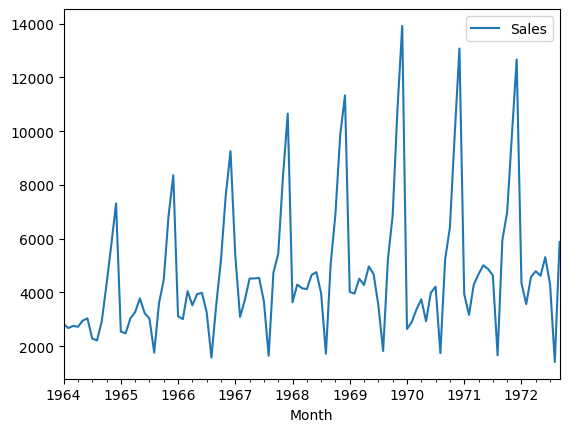

In [ ]:
df.plot()
plt.savefig('graph.png')
content.append(Image("graph.png"))
#doc.build(content)
#working properly




In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
ad_result=adfuller_test(df['Sales'])




ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
## Again test dickey fuller test
ad=adfuller_test(df['Seasonal First Difference'].dropna())
adf_result = str(ad)
type(adf_result)
content.append(ad)

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


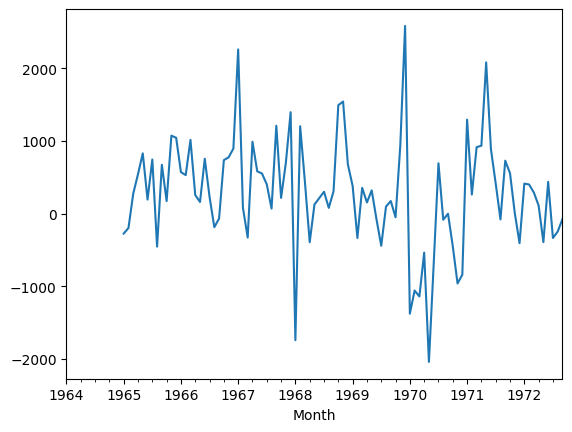

In [ ]:
df['Seasonal First Difference'].plot()
#plt.savefig('graph.png')

#image_path = "graph1.png"
#image = Image(image_path)
#content = [image]  # Ensure that content is a list of ReportLab flowables

# Build the PDF document with the content list
plt.savefig('graph1.png')
content.append(Image("graph1.png"))




## Auto Regressive Model
![image.png](attachment:image.png)

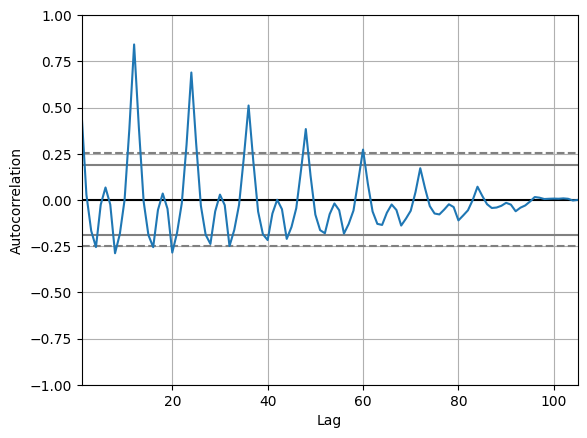

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have loaded your DataFrame df

# Import the autocorrelation_plot directly from pandas.plotting
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation
autocorrelation_plot(df['Sales'])
plt.show()
plt.savefig('graph3.png')
content.append(Image("graph3.png"))

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

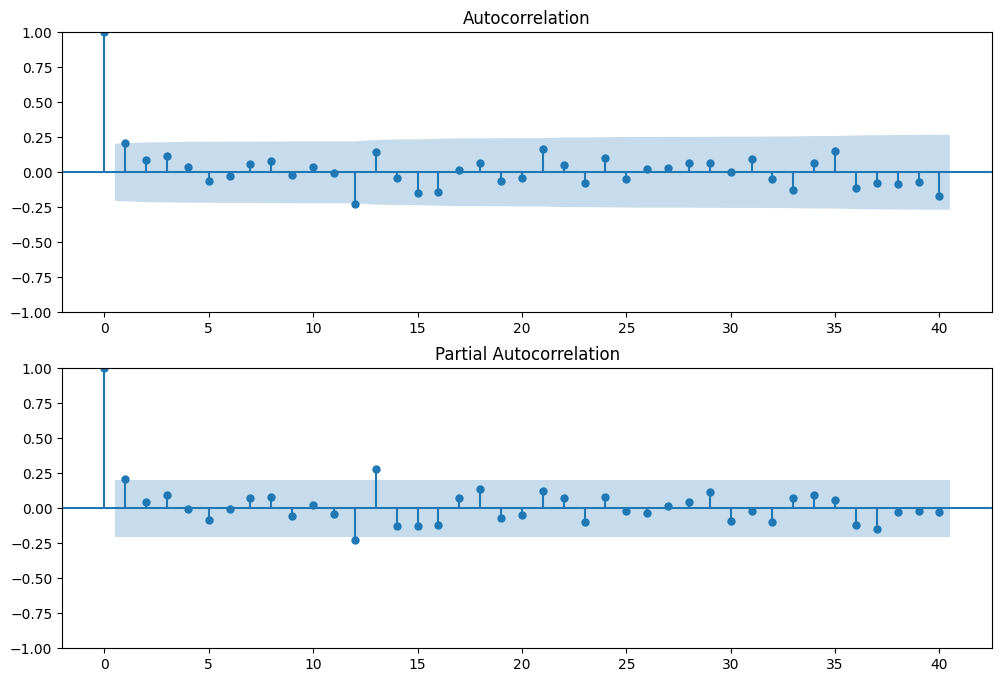

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you already have loaded your DataFrame df

# Plotting autocorrelation
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)

# Plotting partial autocorrelation
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

plt.show()



In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you already have loaded your DataFrame df

# Define the ARIMA model
model = sm.tsa.ARIMA(df['Sales'], order=(1, 1, 1))  # (p, d, q)

# Fit the ARIMA model
model_fit = model.fit()

type(model_fit)

# Print model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 10 Apr 2024   AIC                           1911.627
Time:                        07:49:47   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.0

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 10 Apr 2024   AIC                           1911.627
Time:                        07:49:51   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

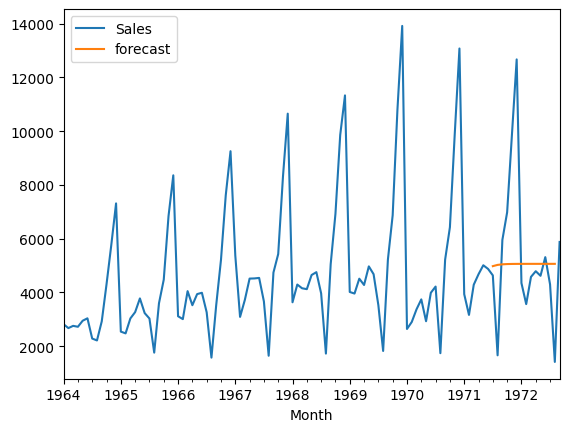

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot()
plt.savefig('graph5.png')
content.append(Image("graph5.png"))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


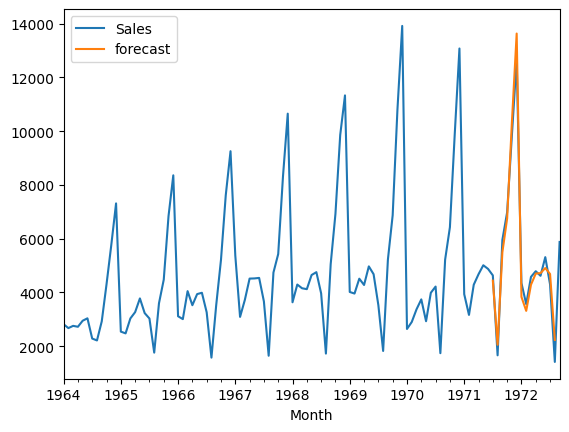

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot()
plt.savefig('graph6.png')
content.append(Image("graph6.png"))



In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

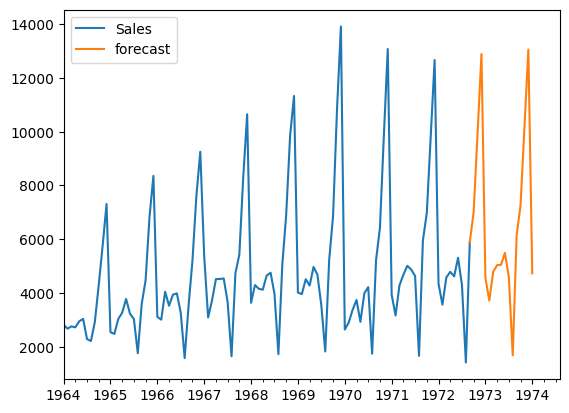

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot()

plt.savefig('graph6.png')
content.append(Image("graph6.png"))
doc.build(content)
